In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
import matplotlib.pyplot as plt

In [3]:
# Load IMDB dataset
vocab_size = 10000
maxlen = 200
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

In [5]:
y_train[0]

np.int64(1)

In [6]:
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [7]:
# Build model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=32, input_length=maxlen),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(x_train, y_train, epochs=10, batch_size=512, validation_split=0.2)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.5531 - loss: 0.6808 - val_accuracy: 0.7484 - val_loss: 0.5224
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.8301 - loss: 0.3916 - val_accuracy: 0.8664 - val_loss: 0.3143
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9335 - loss: 0.1869 - val_accuracy: 0.8650 - val_loss: 0.3207
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.9661 - loss: 0.1166 - val_accuracy: 0.8632 - val_loss: 0.3270
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.9922 - loss: 0.0498 - val_accuracy: 0.8624 - val_loss: 0.3503
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9980 - loss: 0.0214 - val_accuracy: 0.8680 - val_loss: 0.3632
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9988 - loss: 0.0138 - val_accuracy: 0.8586 - val_loss: 0.3990
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.9995 - loss: 0.0078 - val_accuracy: 0.8668 - v

In [10]:
# Evaluate model
results = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {results[1]*100:.2f}%")

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8603 - loss: 0.4315
Test Accuracy: 86.23%


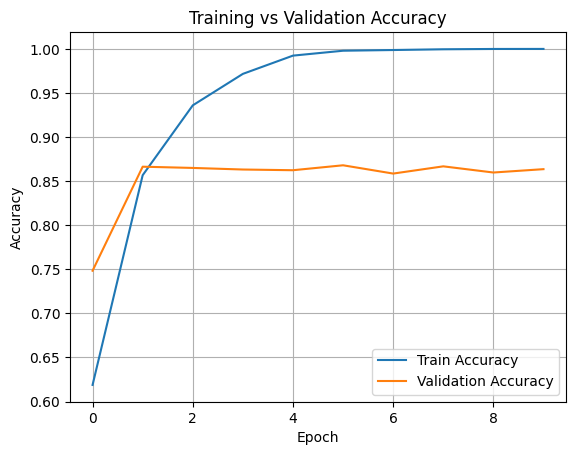

In [11]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.grid(True)
plt.show()